### MULTICLASS CLASSIFICATION FOR METAL, CLASSICAL, BLUES, HIPHOP, POP AND REGGAE MUSIC GENRES


* First of all, let's import every library and our config.py and functions.py files to the notebook.

# COMMUNICATE WITH OTHER JUPYTER FILES

In [1]:
import io, os, sys, types
from IPython import get_ipython
from nbformat import read
from IPython.core.interactiveshell import InteractiveShell

def find_notebook(fullname, path=None):
    """find a notebook, given its fully qualified name and an optional path
    
    This turns "foo.bar" into "foo/bar.ipynb"
    and tries turning "Foo_Bar" into "Foo Bar" if Foo_Bar
    does not exist.
    """
    name = fullname.rsplit('.', 1)[-1]
    if not path:
        path = ['']
    for d in path:
        nb_path = os.path.join(d, name + ".ipynb")
        if os.path.isfile(nb_path):
            return nb_path
        # let import Notebook_Name find "Notebook Name.ipynb"
        nb_path = nb_path.replace("_", " ")
        if os.path.isfile(nb_path):
            return nb_path
        
class NotebookLoader(object):
    """Module Loader for Jupyter Notebooks"""
    def __init__(self, path=None):
        self.shell = InteractiveShell.instance()
        self.path = path
    
    def load_module(self, fullname):
        """import a notebook as a module"""
        path = find_notebook(fullname, self.path)
        
        print ("importing Jupyter notebook from %s" % path)
                                       
        # load the notebook object
        with io.open(path, 'r', encoding='utf-8') as f:
            nb = read(f, 4)
        
        
        # create the module and add it to sys.modules
        # if name in sys.modules:
        #    return sys.modules[name]
        mod = types.ModuleType(fullname)
        mod.__file__ = path
        mod.__loader__ = self
        mod.__dict__['get_ipython'] = get_ipython
        sys.modules[fullname] = mod
        
        # extra work to ensure that magics that would affect the user_ns
        # actually affect the notebook module's ns
        save_user_ns = self.shell.user_ns
        self.shell.user_ns = mod.__dict__
        
        try:
          for cell in nb.cells:
            if cell.cell_type == 'code':
                # transform the input to executable Python
                code = self.shell.input_transformer_manager.transform_cell(cell.source)
                # run the code in themodule
                exec(code, mod.__dict__)
        finally:
            self.shell.user_ns = save_user_ns
        return mod
    
class NotebookFinder(object):
    """Module finder that locates Jupyter Notebooks"""
    def __init__(self):
        self.loaders = {}
    
    def find_module(self, fullname, path=None):
        nb_path = find_notebook(fullname, path)
        if not nb_path:
            return
        
        key = path
        if path:
            # lists aren't hashable
            key = os.path.sep.join(path)
        
        if key not in self.loaders:
            self.loaders[key] = NotebookLoader(path)
        return self.loaders[key]
    


In [2]:
sys.meta_path.append(NotebookFinder())

In [3]:
import functions as f

importing Jupyter notebook from functions.ipynb
None


In [4]:
%matplotlib inline
import itertools
import scipy, matplotlib.pyplot as plt, pandas, librosa,sklearn
import config
import numpy as np
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

* We obtain data from our dataset.

In [5]:
data=pandas.read_csv('data/dataset.csv',index_col=False)
GENRES=['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']

number_of_rows,number_of_cols = data.shape
data[:5].style

,meanZCR,stdZCR,meanSpecCentroid,stdSpecCentroid,meanSpecContrast,stdSpecContrast,meanSpecBandwidth,stdSpecBandwidth,meanSpecRollof,stdSpecRollof,meanMFCC_1,stdMFCC_1,meanMFCC_2,stdMFCC_2,meanMFCC_3,stdMFCC_3,meanMFCC_4,stdMFCC_4,meanMFCC_5,stdMFCC_5,meanMFCC_6,stdMFCC_6,meanMFCC_7,stdMFCC_7,meanMFCC_8,stdMFCC_8,meanMFCC_9,stdMFCC_9,meanMFCC_10,stdMFCC_10,meanMFCC_11,stdMFCC_11,meanMFCC_12,stdMFCC_12,meanMFCC_13,stdMFCC_13,genre
0,-0.505871,-0.784343,-0.381408,-0.708689,-0.107291,0.349902,-0.18728,-0.572265,-0.274697,-0.494996,0.147821,-0.710704,-0.141806,-0.528535,0.268372,-0.543969,-0.127472,-0.543927,0.24025,-0.56626,-0.316155,-0.498744,0.455135,-0.220863,-0.0872071,-0.425686,0.20487,-0.138707,-0.174782,-0.716931,0.337462,-0.826331,0.0651917,-0.802478,0.243325,-0.609704,blues
1,-0.789556,-0.726759,-0.559681,-0.478612,-0.214652,0.274741,-0.139501,-0.41469,-0.374833,-0.00788833,0.0832827,-0.574864,0.29803,-0.312947,0.243923,-0.379317,0.212097,-0.245181,0.316814,-0.48145,-0.00451365,0.835014,0.662994,-0.0824327,0.105303,0.300577,0.178903,0.0838867,0.112254,-0.611377,0.429784,-0.771335,0.270596,-0.480038,0.286445,-0.546068,blues
2,-0.590099,-0.556617,-0.500726,-0.536442,0.110841,0.342202,-0.352145,-0.704373,-0.4567,-0.527395,0.277768,-0.259469,-0.168483,-0.49106,0.105974,-0.505016,-0.3753,-0.379773,0.382988,-0.455881,-0.25608,-0.00441049,0.233059,0.401809,-0.0697246,-0.59332,-0.0521303,-0.191802,-0.354216,-0.664704,0.124199,-0.751552,-0.0944673,-0.64745,-0.182938,-0.5303,blues
3,-0.943024,-0.92013,-0.872967,-0.762018,-0.0695439,0.0434305,-0.635685,-0.596014,-0.82717,-0.593149,0.485782,-0.545727,0.200323,-0.541973,-0.00278614,-0.68076,0.255872,-0.485204,-0.0111885,-0.511825,0.315077,-0.484566,0.248491,-0.4121,0.469706,-0.546892,0.0703149,-0.785616,0.293044,-0.776384,0.043961,-0.925492,0.20296,-0.847504,-0.116092,-0.708645,blues
4,-0.20544,-0.400993,-0.236112,-0.256716,0.190382,0.270769,-0.310327,-0.532099,-0.23499,-0.160723,0.0644567,0.143065,-0.285304,-0.599906,-0.0256704,-0.327846,-0.822026,-0.351386,0.126584,-0.184887,-0.572834,-0.0564981,0.024575,0.295925,-0.212133,-0.0841076,-0.17495,0.116698,-0.436034,-0.672466,-0.260825,-0.717212,0.166494,-0.222193,-0.36799,-0.278997,blues


# CORRELATION

In [6]:
from sklearn.preprocessing import LabelEncoder
genre = LabelEncoder()
genre_dataset = data
genre_dataset['genre'] = genre.fit_transform(genre_dataset['genre'])

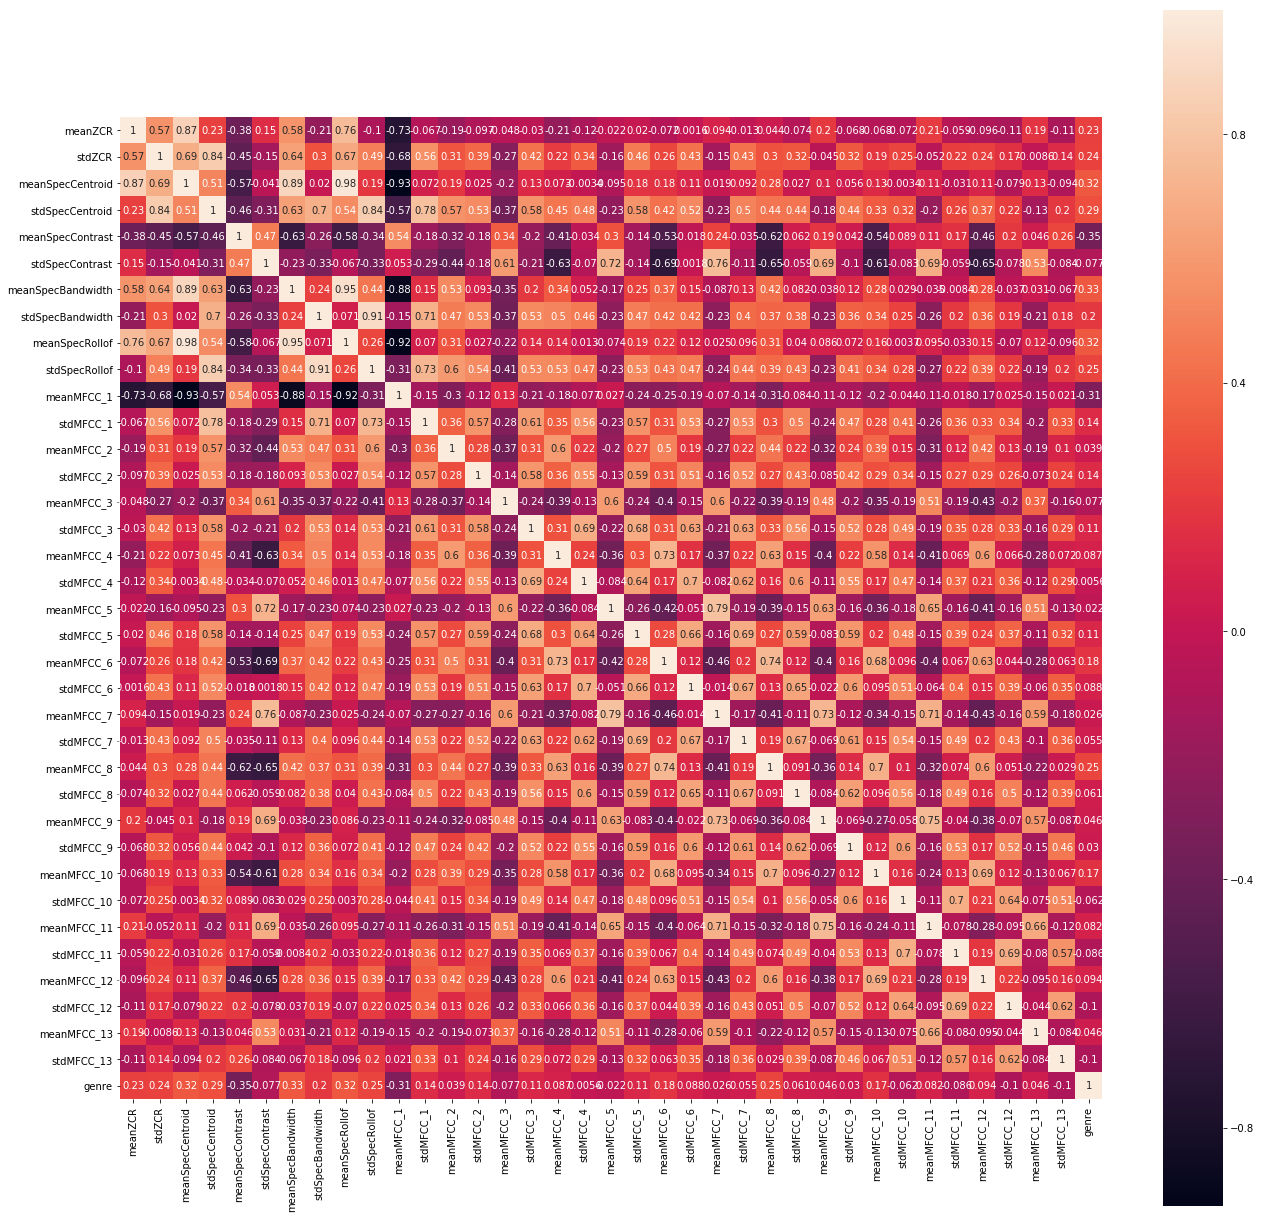

In [7]:
fig = plt.subplots(figsize = (22,22))
sns.heatmap(genre_dataset.corr(),square = True,cbar=True,annot=True,annot_kws={'size': 10})
plt.show()

In [8]:
genre_dataset['genre'] = genre.inverse_transform(genre_dataset['genre'])

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


* Let's split our dataset..
* Then we seperate both train and test datasets into two part. One for feature columns, one for class column.

In [9]:
from sklearn.model_selection import train_test_split

data_values=np.array(data)

train, test = train_test_split(data_values, test_size = 0.3,random_state=2, stratify=data_values[:,number_of_cols-1])

train_x=train[:,:number_of_cols-1]
train_y=train[:,number_of_cols-1]

test_x=test[:,:number_of_cols-1]
test_y=test[:,number_of_cols-1]

print("Training data size: {}".format(train.shape))
print("Test data size: {}".format(test.shape))

Training data size: (669, 37)
Test data size: (288, 37)


* We use several machine learning algorithms to make classification.
 - **Algorithms used:**
   - K-Nearest Neighbor
   - Random Forest
   - Support Vector Machine
   - Neural Network
   - ExtraTreesClassifier

* Application of KNN algorithm and its performance analysis

Max Accuracy is 0.573 on test dataset with 10 neighbors.

Training Score: 0.652
Test score: 0.573
---------------PERFORMANCE ANALYSIS FOR THE MODEL----------------

F1 Score:  0.578665573577692
Precision Score:  0.5943328257569743
Recall Score:  0.5833333333333333


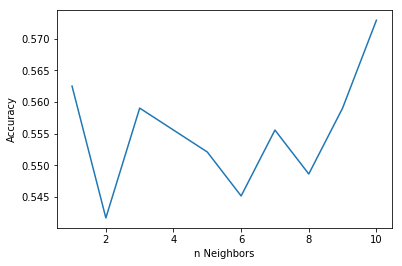

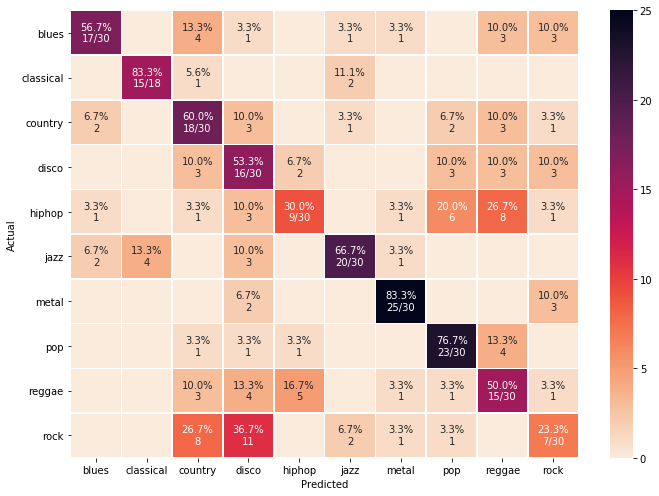

In [10]:
results_knn=[]
for i in range(1,11):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(train_x,train_y)
    results_knn.append(knn.score(test_x,test_y))
    
max_accuracy_knn=max(results_knn)
best_k=1+results_knn.index(max(results_knn))
print("Max Accuracy is {:.3f} on test dataset with {} neighbors.\n".format(max_accuracy_knn,best_k))

plt.plot(np.arange(1,11),results_knn)
plt.xlabel("n Neighbors")
plt.ylabel("Accuracy")


knn=KNeighborsClassifier(n_neighbors=best_k)
knn.fit(train_x,train_y)
print("Training Score: {:.3f}".format(knn.score(train_x,train_y)))
print("Test score: {:.3f}".format(knn.score(test_x,test_y)))  

f.plot_cnf(knn,test_x,test_y,GENRES)

* Application of Random Forest algorithm and its performance analysis

Max Accuracy is 0.573 on test dataset with 19 estimators.

Training Score: 0.999
Test score: 0.573
---------------PERFORMANCE ANALYSIS FOR THE MODEL----------------

F1 Score:  0.5739911487672124
Precision Score:  0.5745985536872198
Recall Score:  0.5811111111111111


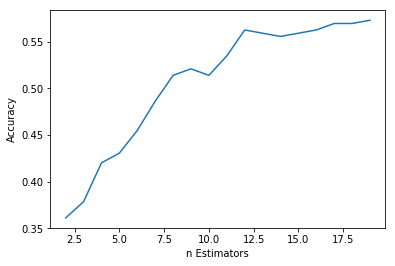

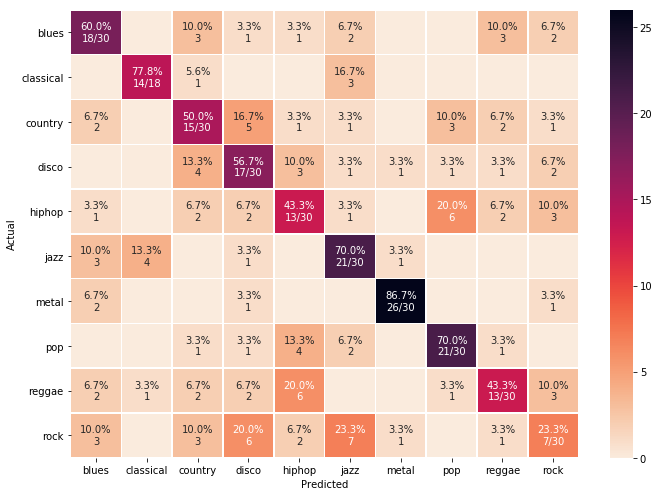

In [11]:
results_forest=[]
for i in range(2,20):
    forest=RandomForestClassifier(random_state=42,n_estimators=i)
    forest.fit(train_x,train_y)
    results_forest.append(forest.score(test_x,test_y))
    
max_accuracy_forest=max(results_forest)
best_n_est=2+results_forest.index(max(results_forest))
print("Max Accuracy is {:.3f} on test dataset with {} estimators.\n".format(max_accuracy_forest,best_n_est))

plt.plot(np.arange(2,20),results_forest)
plt.xlabel("n Estimators")
plt.ylabel("Accuracy")


forest=RandomForestClassifier(random_state=42,n_estimators=best_n_est)
forest.fit(train_x,train_y)
print("Training Score: {:.3f}".format(forest.score(train_x,train_y)))
print("Test score: {:.3f}".format(forest.score(test_x,test_y)))

f.plot_cnf(forest,test_x,test_y,GENRES)

* Application of SVM algorithm and its performance analysis

Training Score: 0.994
Test score: 0.635
---------------PERFORMANCE ANALYSIS FOR THE MODEL----------------

F1 Score:  0.6415163532925575
Precision Score:  0.6489298515104966
Recall Score:  0.6455555555555557


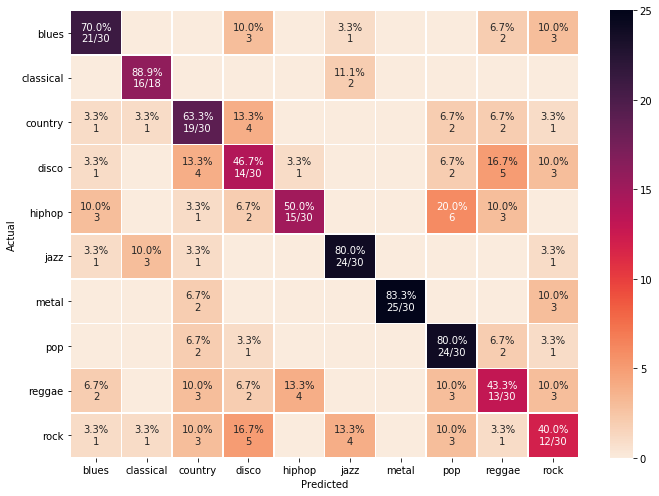

In [12]:
svm=SVC(C=100,gamma=0.08)
svm.fit(train_x,train_y)
print("Training Score: {:.3f}".format(svm.score(train_x,train_y)))
print("Test score: {:.3f}".format(svm.score(test_x,test_y)))

f.plot_cnf(svm,test_x,test_y,GENRES)

* Application of Neural Network algorithm and its performance analysis

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Training Score: 0.894
Test score: 0.646
---------------PERFORMANCE ANALYSIS FOR THE MODEL----------------

F1 Score:  0.6439421404038842
Precision Score:  0.6459200737002462
Recall Score:  0.6555555555555556


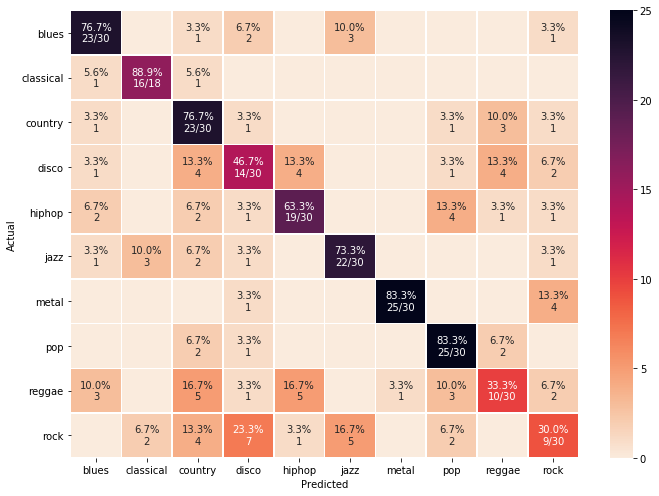

In [13]:
neural=MLPClassifier(max_iter=400,random_state=2,hidden_layer_sizes=[40,40])
neural.fit(train_x,train_y)
print("Training Score: {:.3f}".format(neural.score(train_x,train_y)))
print("Test score: {:.3f}".format(neural.score(test_x,test_y)))

f.plot_cnf(neural,test_x,test_y,GENRES)

Training Score: 0.999
Test score: 0.528
---------------PERFORMANCE ANALYSIS FOR THE MODEL----------------

F1 Score:  0.5264756295792401
Precision Score:  0.5352351949050533
Recall Score:  0.54


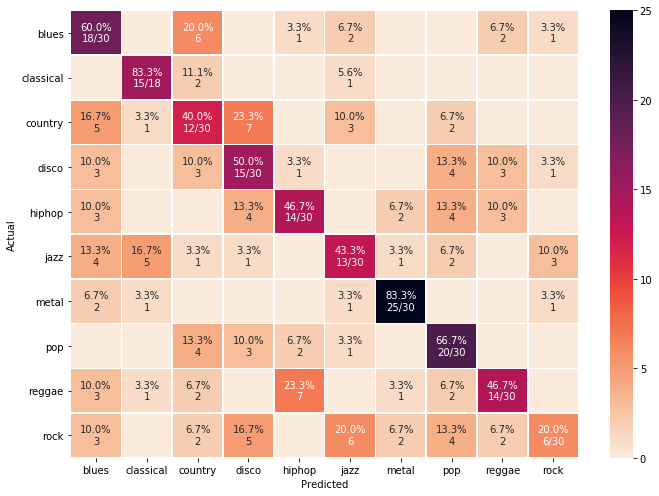

In [14]:
from sklearn.ensemble import ExtraTreesClassifier
extra=ExtraTreesClassifier()
extra.fit(train_x,train_y)
print("Training Score: {:.3f}".format(extra.score(train_x,train_y)))
print("Test score: {:.3f}".format(extra.score(test_x,test_y)))

f.plot_cnf(extra,test_x,test_y,GENRES)

Training Score: 0.311
Test score: 0.306
---------------PERFORMANCE ANALYSIS FOR THE MODEL----------------

F1 Score:  0.26126500506095285
Precision Score:  0.32824418264738875
Recall Score:  0.29333333333333333


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


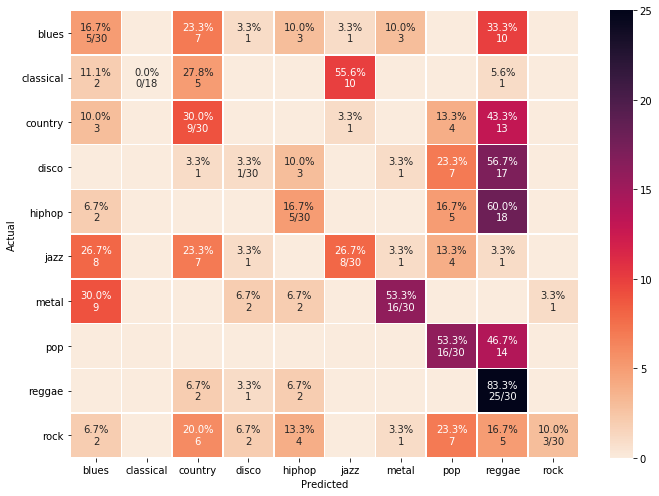

In [15]:
from sklearn import svm
clf = svm.SVC(kernel='poly',C=1,probability=True)
clf.fit(train_x,train_y)
print("Training Score: {:.3f}".format(clf.score(train_x,train_y)))
print("Test score: {:.3f}".format(clf.score(test_x,test_y)))

f.plot_cnf(clf,test_x,test_y,GENRES)



# LEARNING CURVES

In [16]:
X_test=test_x
y_test=test_y
from sklearn.feature_selection import RFE

from sklearn import tree
print("Learning Curves (DecisionTreeClassifier)")
estimator = tree.DecisionTreeClassifier()
rfe = RFE(estimator)
rfe = rfe.fit(X_test, y_test)
# summarize the selection of the attributes
print(rfe.n_features_)
print(rfe.support_)
print(rfe.ranking_)



from sklearn.ensemble import RandomForestClassifier
print("Learning Curves (RandomForestClassifier)")
estimator = clf = RandomForestClassifier(n_estimators=10, max_depth=None,min_samples_split=2, random_state=0)
rfe = RFE(estimator)
rfe = rfe.fit(X_test, y_test)
# summarize the selection of the attributes
print(rfe.n_features_)
print(rfe.support_)
print(rfe.ranking_)

from sklearn.ensemble import ExtraTreesClassifier
print("Learning Curves (ExtraTreesClassifier)")
estimator = ExtraTreesClassifier()
rfe = RFE(estimator)
rfe = rfe.fit(X_test, y_test)
# summarize the selection of the attributes
print(rfe.n_features_)
print(rfe.support_)
print(rfe.ranking_)

Learning Curves (DecisionTreeClassifier)
18
[False False False  True  True  True  True False False  True False  True
 False False False False  True  True  True  True  True False False  True
  True  True False  True  True False  True False  True False False False]
[ 8  4 18  1  1  1  1  5 16  1  3  1  7  2  9 17  1  1  1  1  1 13 19  1
  1  1 14  1  1 10  1 11  1 15 12  6]
Learning Curves (RandomForestClassifier)
18
[False  True False  True  True  True  True False  True  True False False
  True  True  True  True False  True  True  True False False False False
  True False False False  True  True  True False False False False False]
[ 4  1  7  1  1  1  1 14  1  1 15 17  1  1  1  1 18  1  1  1 10 11  2  3
  1  8  6 12  1  1  1 16  9 19 13  5]
Learning Curves (ExtraTreesClassifier)
18
[ True  True  True  True  True  True  True False  True False False False
  True  True  True  True False  True False False False False False False
 False False  True  True  True False  True False  True False F

# meanZCR	stdZCR	meanSpecCentroid	stdSpecCentroid	meanSpecContrast	stdSpecContrast	meanSpecBandwidth	stdSpecBandwidth	meanSpecRollof	stdSpecRollof	meanMFCC_1	stdMFCC_1	meanMFCC_2	stdMFCC_2	meanMFCC_3	stdMFCC_3	meanMFCC_4	stdMFCC_4	meanMFCC_5	stdMFCC_5	meanMFCC_6	stdMFCC_6	meanMFCC_7	stdMFCC_7	meanMFCC_8	stdMFCC_8	meanMFCC_9	stdMFCC_9	meanMFCC_10	stdMFCC_10	meanMFCC_11	stdMFCC_11	meanMFCC_12	stdMFCC_12	meanMFCC_13	stdMFCC_13	

In [18]:
data=pandas.read_csv('data/dataset.csv',index_col=False, header=0, names=['meanZCR', 'stdZCR', 'meanSpecCentroid', 'stdSpecCentroid', 'meanSpecContrast', 'stdSpecContrast', 'meanSpecBandwidth', 'stdSpecBandwidth', 'meanSpecRollof', 'stdSpecRollof', 'meanMFCC_1', 'stdMFCC_1', 'meanMFCC_2', 'stdMFCC_2', 'meanMFCC_3', 'stdMFCC_3', 'meanMFCC_4', 'stdMFCC_4 meanMFCC_5', 'stdMFCC_5', 'meanMFCC_6', 'stdMFCC_6', 'meanMFCC_7', 'stdMFCC_7', 'meanMFCC_8', 'stdMFCC_8' ,'meanMFCC_9', 'stdMFCC_9', 'meanMFCC_10', 'stdMFCC_10', 'meanMFCC_11', 'stdMFCC_11', 'meanMFCC_12', 'stdMFCC_12', 'meanMFCC_1', 'stdMFCC_13','genre'])
GENRES=['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']

number_of_rows,number_of_cols = data.shape
data[:5].style

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\pandas\io\parsers.py:678: UserWarning: Duplicate names specified. This will raise an error in the future.
  return _read(filepath_or_buffer, kwds)


,meanZCR,stdZCR,meanSpecCentroid,stdSpecCentroid,meanSpecContrast,stdSpecContrast,meanSpecBandwidth,stdSpecBandwidth,meanSpecRollof,stdSpecRollof,meanMFCC_1,stdMFCC_1,meanMFCC_2,stdMFCC_2,meanMFCC_3,stdMFCC_3,meanMFCC_4,stdMFCC_4 meanMFCC_5,stdMFCC_5,meanMFCC_6,stdMFCC_6,meanMFCC_7,stdMFCC_7,meanMFCC_8,stdMFCC_8,meanMFCC_9,stdMFCC_9,meanMFCC_10,stdMFCC_10,meanMFCC_11,stdMFCC_11,meanMFCC_12,stdMFCC_12,meanMFCC_1.1,stdMFCC_13,genre
0,-0.505871,-0.784343,-0.381408,-0.708689,-0.107291,0.349902,-0.18728,-0.572265,-0.274697,-0.494996,0.147821,-0.710704,-0.141806,-0.528535,0.268372,-0.543969,-0.127472,-0.543927,0.24025,-0.56626,-0.316155,-0.498744,0.455135,-0.220863,-0.0872071,-0.425686,0.20487,-0.138707,-0.174782,-0.716931,0.337462,-0.826331,0.0651917,-0.802478,0.243325,-0.609704
1,-0.789556,-0.726759,-0.559681,-0.478612,-0.214652,0.274741,-0.139501,-0.41469,-0.374833,-0.00788833,0.0832827,-0.574864,0.29803,-0.312947,0.243923,-0.379317,0.212097,-0.245181,0.316814,-0.48145,-0.00451365,0.835014,0.662994,-0.0824327,0.105303,0.300577,0.178903,0.0838867,0.112254,-0.611377,0.429784,-0.771335,0.270596,-0.480038,0.286445,-0.546068
2,-0.590099,-0.556617,-0.500726,-0.536442,0.110841,0.342202,-0.352145,-0.704373,-0.4567,-0.527395,0.277768,-0.259469,-0.168483,-0.49106,0.105974,-0.505016,-0.3753,-0.379773,0.382988,-0.455881,-0.25608,-0.00441049,0.233059,0.401809,-0.0697246,-0.59332,-0.0521303,-0.191802,-0.354216,-0.664704,0.124199,-0.751552,-0.0944673,-0.64745,-0.182938,-0.5303
3,-0.943024,-0.92013,-0.872967,-0.762018,-0.0695439,0.0434305,-0.635685,-0.596014,-0.82717,-0.593149,0.485782,-0.545727,0.200323,-0.541973,-0.00278614,-0.68076,0.255872,-0.485204,-0.0111885,-0.511825,0.315077,-0.484566,0.248491,-0.4121,0.469706,-0.546892,0.0703149,-0.785616,0.293044,-0.776384,0.043961,-0.925492,0.20296,-0.847504,-0.116092,-0.708645
4,-0.20544,-0.400993,-0.236112,-0.256716,0.190382,0.270769,-0.310327,-0.532099,-0.23499,-0.160723,0.0644567,0.143065,-0.285304,-0.599906,-0.0256704,-0.327846,-0.822026,-0.351386,0.126584,-0.184887,-0.572834,-0.0564981,0.024575,0.295925,-0.212133,-0.0841076,-0.17495,0.116698,-0.436034,-0.672466,-0.260825,-0.717212,0.166494,-0.222193,-0.36799,-0.278997


In [19]:
from sklearn.model_selection import train_test_split

data_values=np.array(data)

train, test = train_test_split(data_values, test_size = 0.3,random_state=2)

train_x=train[:,:number_of_cols-1]
train_y=train[:,number_of_cols-1]

test_x=test[:,:number_of_cols-1]
test_y=test[:,number_of_cols-1]

print("Training data size: {}".format(train.shape))
print("Test data size: {}".format(test.shape))

Training data size: (669, 36)
Test data size: (288, 36)
